# Decision Tree

In [21]:
# Import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


data = pd.read_csv("preprocessed_data.csv")
data

age gender  height_cm  weight_kg  body_fat_%  diastolic  systolic   
0      27.0      M      172.3      75.24        21.3       80.0     130.0  \
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13315  25.0      M      172.1      71.80        16.2       74.0     141.0   
13316  21.0      M      179.7      63.90        12.1       74.0     128.0   
13317  39.0      M      177.2      80.50        20.1       78.0     132.0   
13318  64.0      F      146.1      57.70        40.4       68.0     121.0   
13319  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripforce  sit_and_bend_forward_cm  sit_ups_counts  broad_jump_cm   
0           54.9                     18.4            60.0          217.0  \
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13315       35.8                     17.4            47.0          198.0   
13316       33.0                      1.1            48.0          167.0   
13317       63.5                     16.4            45.0          229.0   
13318       19.3                      9.2             0.0           75.0   
13319       35.9                      7.1            51.0          180.0   

      class    bmi  
0         C  22.79  
1         A  17.78  
2         C  22.46  
3         B  21.21  
4         B  20.30  
...     ...    ...  
13315     C  21.78  
13316     D  18.39  
13317     A  23.57  
13318     D  20.96  
13319     C  21.21  

[13320 rows x 13 columns]

In [23]:
feature_cols = ['age','height_cm','weight_kg','body_fat_%','diastolic','systolic','gripforce','sit_and_bend_forward_cm','sit_ups_counts','broad_jump_cm','bmi']
x = data[feature_cols]
y = data['class']

In [24]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6298798798798799


In [ ]:
#ปรับขนาดตรงนี้นะพี่
plt.figure(figsize = (100,100))
#ปรับขนาดฟร้อนให้เล็กลงด้วยก็ได้ ตรง fontsize
plot_tree(clf,filled=True,
            feature_names = feature_cols,class_names=['A','B','C','D'],fontsize=16)

[Text(0.2415528830954743, 0.9838709677419355, 'sit_and_bend_forward_cm <= 9.25\ngini = 0.75\nsamples = 9324\nvalue = [2375, 2321, 2319, 2309]\nclass = A'),
 Text(0.020989299467077893, 0.9516129032258065, 'sit_and_bend_forward_cm <= 4.55\ngini = 0.441\nsamples = 1838\nvalue = [0, 39, 532, 1267]\nclass = D'),
 Text(0.0021550488174327453, 0.9193548387096774, 'age <= 59.5\ngini = 0.068\nsamples = 874\nvalue = [0, 0, 31, 843]\nclass = D'),
 Text(0.0010775244087163727, 0.8870967741935484, 'age <= 56.5\ngini = 0.005\nsamples = 773\nvalue = [0, 0, 2, 771]\nclass = D'),
 Text(0.0005387622043581863, 0.8548387096774194, 'gini = 0.0\nsamples = 743\nvalue = [0, 0, 0, 743]\nclass = D'),
 Text(0.0016162866130745592, 0.8548387096774194, 'gripforce <= 48.7\ngini = 0.124\nsamples = 30\nvalue = [0, 0, 2, 28]\nclass = D'),
 Text(0.0010775244087163727, 0.8225806451612904, 'sit_ups_counts <= 36.5\ngini = 0.067\nsamples = 29\nvalue = [0, 0, 1, 28]\nclass = D'),
 Text(0.0005387622043581863, 0.7903225806451613

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5598098098098098


[Text(0.5, 0.875, 'sit_and_bend_forward_cm <= 11.75\nentropy = 2.0\nsamples = 9324\nvalue = [2375, 2321, 2319, 2309]\nclass = A'),
 Text(0.25, 0.625, 'sit_and_bend_forward_cm <= 4.55\nentropy = 1.346\nsamples = 2600\nvalue = [0, 291, 840, 1469]\nclass = D'),
 Text(0.125, 0.375, 'age <= 56.5\nentropy = 0.221\nsamples = 874\nvalue = [0, 0, 31, 843]\nclass = D'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 743\nvalue = [0, 0, 0, 743]\nclass = D'),
 Text(0.1875, 0.125, 'entropy = 0.789\nsamples = 131\nvalue = [0, 0, 31, 100]\nclass = D'),
 Text(0.375, 0.375, 'body_fat_% <= 25.25\nentropy = 1.476\nsamples = 1726\nvalue = [0, 291, 809, 626]\nclass = C'),
 Text(0.3125, 0.125, 'entropy = 1.352\nsamples = 1176\nvalue = [0, 246, 718, 212]\nclass = C'),
 Text(0.4375, 0.125, 'entropy = 1.033\nsamples = 550\nvalue = [0, 45, 91, 414]\nclass = D'),
 Text(0.75, 0.625, 'sit_ups_counts <= 30.5\nentropy = 1.907\nsamples = 6724\nvalue = [2375, 2030, 1479, 840]\nclass = A'),
 Text(0.625, 0.375, 'sit_ups

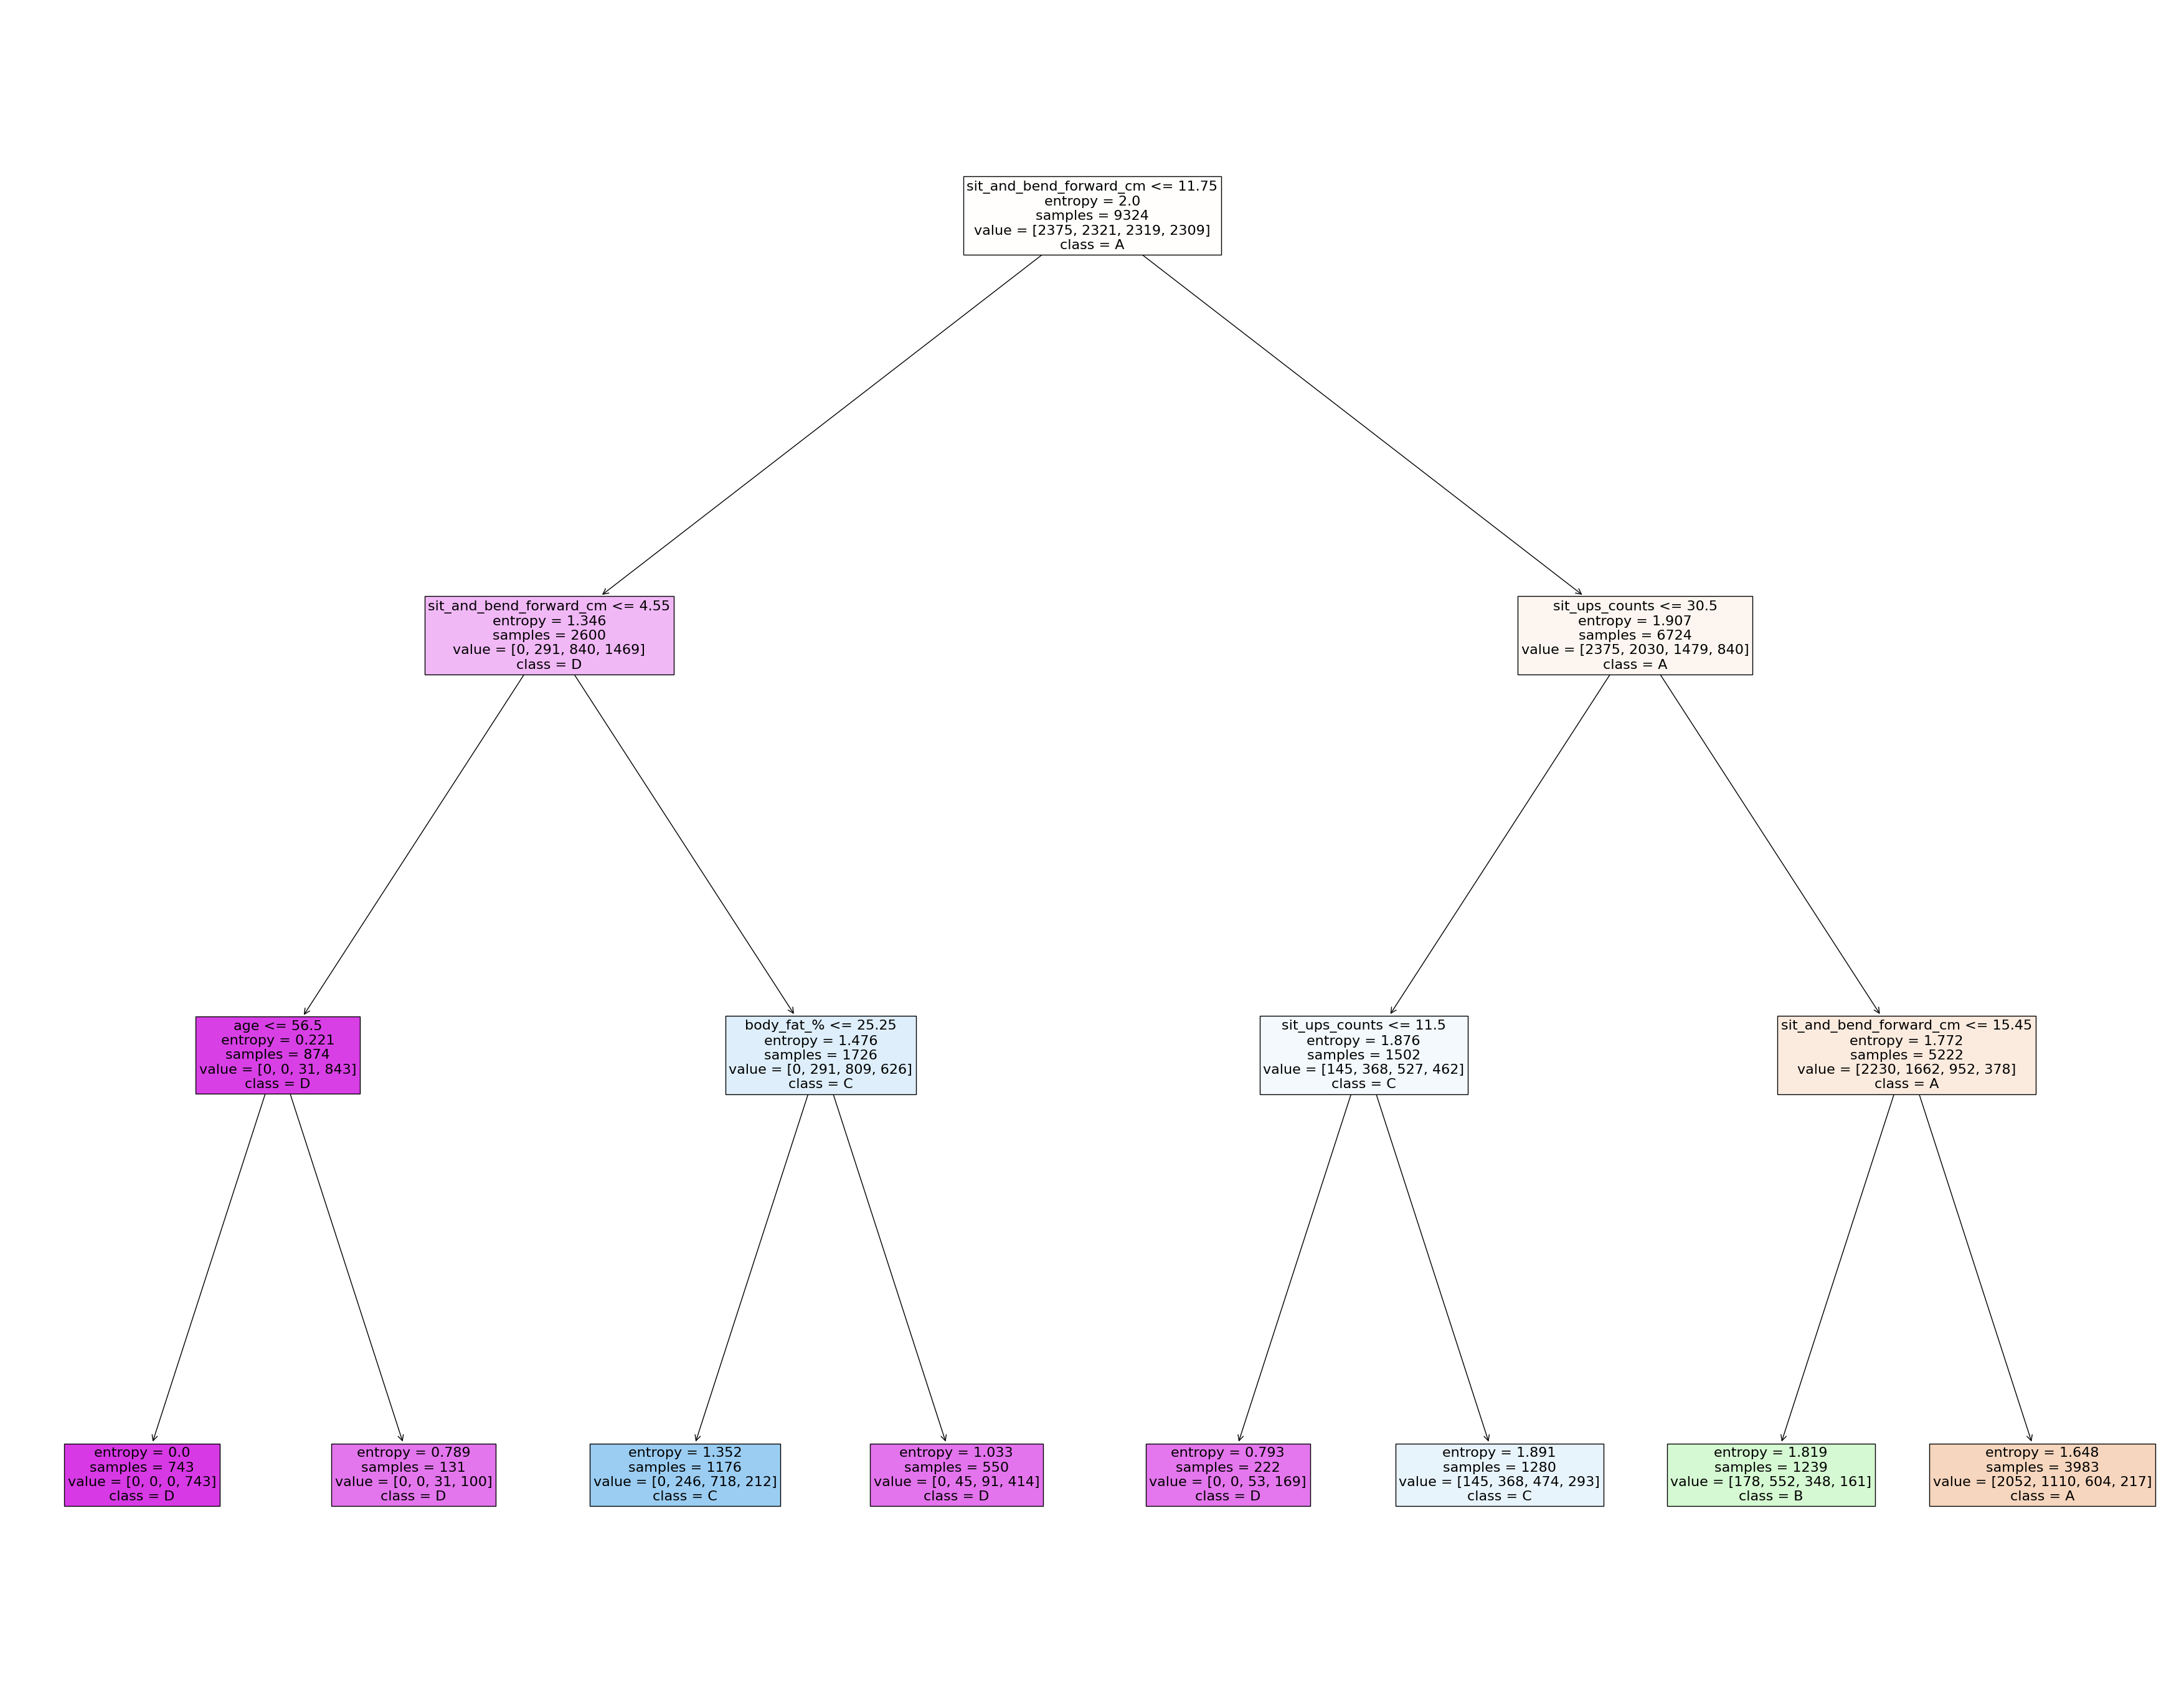

In [29]:
plt.figure(figsize = (45,35))

plot_tree(clf,filled=True,
            feature_names = feature_cols,class_names=['A','B','C','D'],fontsize=16)
#pydotplus.graph_from_dot_data(dot_data)  
#fig.savefig('imagename.png')
#graph.show_png('diabetes.png')
#Image(graph.create_png())
